## Birds Classifier


1.   Creating Dataset
2.   View Data
3.   Train Model
4. Unfreezing our data, fine-tuning, and our learning rates
5.   Interpretation



Now we are going to make our custom data to use it.

In thise task we are going to build a model that classify between blue bird, red wing black bird and blue jay bird.

So first of all we need to import our libraries

In [1]:
#Run once per session
!pip install fastai -q --upgrade

In [2]:
from fastai.vision.all import *

In [3]:
from fastcore.foundation import L
from fastcore.xtras import Path # @patch'd properties to the Pathlib module

from fastai.callback.fp16 import to_fp16
from fastai.callback.schedule import fit_one_cycle, lr_find 

from fastai.data.block import CategoryBlock, DataBlock
from fastai.data.transforms import get_image_files, Normalize, RandomSplitter, parent_label

from fastai.interpret import ClassificationInterpretation
from fastai.learner import Learner # imports @patch'd properties to Learner including `save`, `load`, `freeze`, and `unfreeze`

from fastai.vision.augment import aug_transforms, RandomResizedCrop
from fastai.vision.core import imagenet_stats
from fastai.vision.data import ImageBlock
from fastai.vision.learner import cnn_learner
from fastai.vision.utils import download_images, verify_images

##1- Lets Creating Dataset
Now we are going to use `bing-image-downloader`,It's a Python library to download bulk of images form Bing.com. This package uses async url, which makes it very fast while downloading.


So what we need to do here is downlaoding `bing-image-downloader`, and then pass to it our query_string, Number of images to download and Name of output dir.

In [4]:
# Make directory
!mkdir birds

mkdir: cannot create directory ‘birds’: File exists


In [5]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from bing_image_downloader import downloader

In [7]:
# Download blue_bird image and store it in 'blue_bird' folder
downloader.download('blue_bird' , limit = 50 , output_dir='birds')

[%] Downloading Images to /content/birds/blue_bird


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://2.bp.blogspot.com/-g9STQqFQ9Ik/UScse2IifqI/AAAAAAAAA08/mh1immEtVZo/s1600/bluebird.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://3.bp.blogspot.com/-aWyPrGrOe5w/T8vT7iHum1I/AAAAAAAAC7s/NGAXXQ4MCKQ/s1600/Blue-Bird-Wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://hdwpro.com/wp-content/uploads/2016/05/Beautiful-Blue-Bird.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://c.pxhere.com/photos/25/39/bird_bluebird_perching_bluebird_bluebird_on_perch_nature_blue_animal-1382590.jpg!d
[%] File Downloaded !

[%] Downloading Image #5 from http://upload.wikimedia.org/wikipedia/commons/9/9b/Eastern_Bluebird-27527-2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://3.bp.blogspot.com/-nH1XsYo-nTw/TwMx_x4jSdI/AAAAAAAAEv0/eaoevnO1-WE/s1600/bluebird-blue-bird.jpg
[%] File Downloaded !

[%] D

In [8]:
# Download red_wing_black_bird image and store it in 'red_wing_black_bird' folder
downloader.download('red_wing_black_bird' , limit = 50 , output_dir='birds')

[%] Downloading Images to /content/birds/red_wing_black_bird


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://sites.psu.edu/birdsofpa/files/2016/12/J-Red-winged-blackbird-uwni01.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.allaboutbirds.org/guide/assets/photo/63744241-1900px.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.shopify.com/s/files/1/0156/3796/articles/blackbird-3665872_1920_1024x1024.jpg?v=1551383323
[%] File Downloaded !

[%] Downloading Image #4 from https://i1.wp.com/freethoughtblogs.com/affinity/files/2017/04/1-13.jpg?ssl=1
[!] Issue getting: https://i1.wp.com/freethoughtblogs.com/affinity/files/2017/04/1-13.jpg?ssl=1
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #4 from https://bloximages.chicago2.vip.townnews.com/journalstar.com/content/tncms/assets/v3/editorial/6/4a/64aceb5e-13f5-5d2c-bb1e-73cd5003463b/56d14b8fd1d3c.image.jpg?resize=1200%2C1727
[%] File Downloade

In [9]:
# Download blue_jay_bird image and store it in 'blue_jay_bird' folder
downloader.download('blue_jay_bird' , limit = 50 , output_dir='birds')

[%] Downloading Images to /content/birds/blue_jay_bird


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://www.gannett-cdn.com/-mm-/c3adb76d33eb24e53bfb4683581e22edafd19d7b/c=0-0-5177-2925/local/-/media/2016/11/09/INGroup/Evansville/636143021356078947-DSC-2830lr.jpg?width=3200&amp;height=1680&amp;fit=crop
[%] File Downloaded !

[%] Downloading Image #2 from http://birdsflight.com/wp-content/uploads/2012/03/blue-jay-facts2.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://2.bp.blogspot.com/-EktLW172Bvk/UcAY7DuD0CI/AAAAAAAADSQ/u-JPzAx1M5s/s1600/Blue-Jay-Lovely-Bird.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://4.bp.blogspot.com/-6Pm3iqdv3Os/UcAYzO1wkXI/AAAAAAAADRY/ys4r2FPBYUQ/s1600/Beautiful-Blue-Jay-Bird.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://4.bp.blogspot.com/-E0UWoPVuuIY/UcAY1BigDGI/AAAAAAAADRs/yR0cmFffGXI/s1600/Blue-Jay-Bird-Picture.jpg
[%] File Downloaded !

[%] Downloading Image #6

So now our images are downloaded let's check they are all good using `verify_images`. If not, we will delete them 

In [10]:
# names of our labels
classes = ['blue_bird', 'red_wing_black_bird','blue_jay_bird']

In [11]:
path = Path('birds')
path.mkdir(parents=True, exist_ok=True)

In [12]:
imgs = L()
for n in classes:
  print(n)
  path_n = path/n
  imgs += verify_images(path_n.ls())

blue_bird
red_wing_black_bird
blue_jay_bird


In [13]:
imgs

(#0) []

In [14]:
for im in imgs:
  im.unlink()

In [15]:
imgs = L()
for n in classes:
  print(n)
  path_n = path/n
  imgs += verify_images(path_n.ls())

blue_bird
red_wing_black_bird
blue_jay_bird


In [16]:
imgs

(#0) []

## 2- View The Data


Let's make our `DataBlock` again.

In [17]:
birds = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [18]:
dls = birds.dataloaders(path,  bs=32)

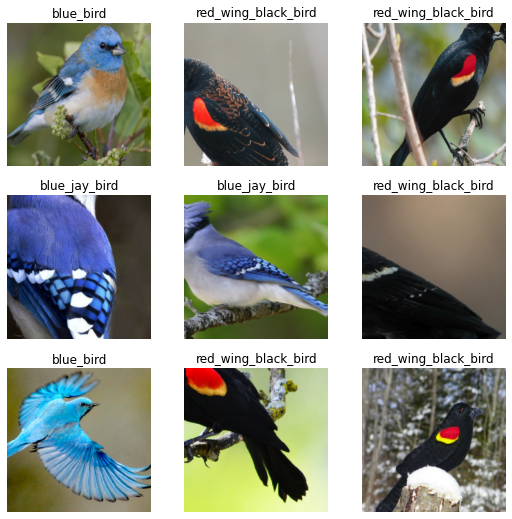

In [19]:
dls.show_batch(max_n=9)

 See the names of our classes we have

In [20]:
dls.vocab

['blue_bird', 'blue_jay_bird', 'red_wing_black_bird']

## 3- Train model

In [21]:
# Make cnn-learner
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [22]:
# Train our model
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.360361,0.523238,0.166667,00:09
1,1.216616,0.462152,0.166667,00:06
2,0.951524,0.519573,0.100000,00:07
3,0.800880,0.491291,0.100000,00:07


In [23]:
learn.save('stage-1')

Path('models/stage-1.pth')

## 4- Unfreezing our data, fine-tuning, and our learning rates

In [24]:
learn.unfreeze()

SuggestedLRs(valley=0.00013182566908653826)

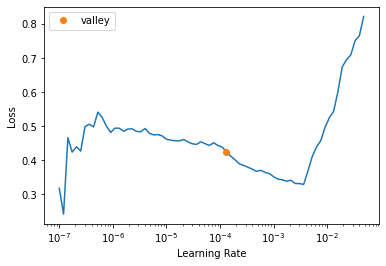

In [25]:
learn.lr_find()

In [26]:
learn.fit_one_cycle(2, lr_max=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.449186,0.592311,0.066667,00:07
1,0.397529,0.611521,0.066667,00:06


In [27]:
learn.save('stage-2')

Path('models/stage-2.pth')

## 5- Interpretation

In [28]:
learn.load('stage-2');

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

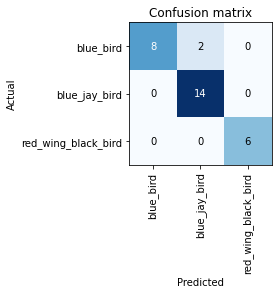

In [30]:
interp.plot_confusion_matrix()

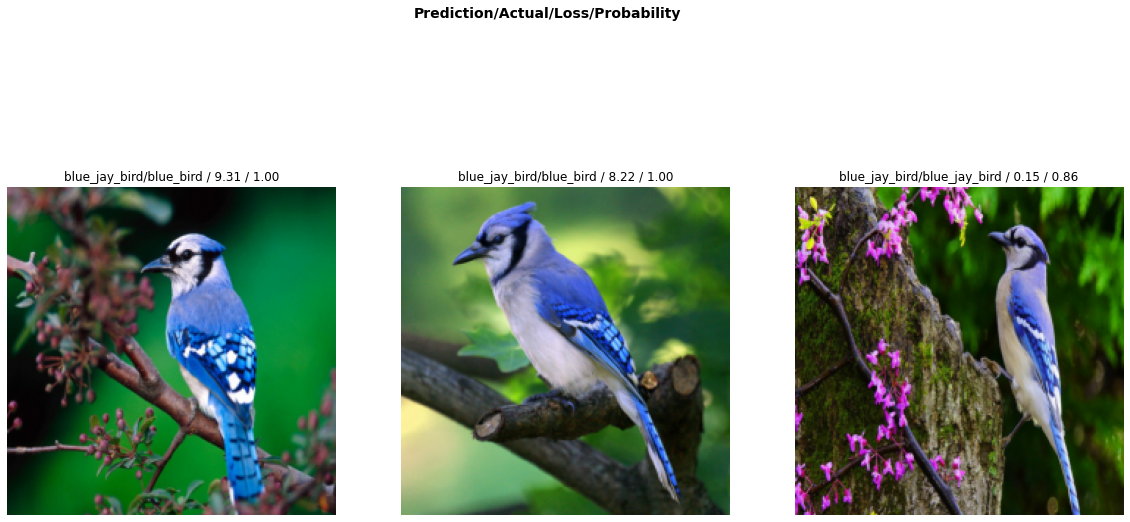

In [32]:
interp.plot_top_losses(3, figsize=(20,10))